# Market Segmentation

### Data Information

In recent years, Lobster Land Amusement Park has allowed a limited number of food trucks to enter the park during each day of operations.  
Each row contains information about one food truck vendor who is potentially interested in gaining access to Lobster Land at some point during the 2024 summer season.  Since Lobster Land can only grant access to a limited number of food trucks at a time, they are hoping that our clustering skills can help them to sort through this data and get a better sense of how to proceed. 

### Dataset Description

|Variable|Description|
| :- | :- |
|**vendorID**|Each vendor in the dataset has a customerID number from 1 to 654. This was done so that vendor data can be tracked.| 
|**avg_transaction_cost**|The average customer expenditure per transaction at this particular food truck.|
|**mnths_operational**|This shows how long this particular food truck has been operational, as measured in months.|
|**days_yr**|This is the number of days per year that the food truck vendor plans to operate this truck.|
|**avg_cost_item**|This is the average customer expenditure per item sold at this particular food truck.|
|**dist_lobland**|This is the distance, in miles, between the vendor’s home address and the front gate to Lobster Land.|
|**number_trucks**|This is the total number of food trucks currently operated & managed by the vendor.|
|**bev_percent**|This is an estimate of the percentage of sales made at this food truck that are attributable to beverages (as opposed to food.)|

## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## - Reading the data

In [2]:
df = pd.read_csv(r"food_trucks.csv")
df

,vendorID,avg_transaction_cost,mnths_operational,days_yr,avg_cost_item,number_trucks,dist_lobland,bev_percent
0,1,12.40,3.0,163,6.83,2,0.12,30.0
1,2,12.10,1.8,140,3.62,5,269.24,40.5
2,3,13.52,6.0,139,3.86,5,8.17,35.7
3,4,15.56,4.0,124,4.05,3,99.09,32.8
4,5,15.08,8.5,186,6.51,5,33.42,35.6
...,...,...,...,...,...,...,...,...
243,244,14.70,2.5,153,10.13,3,127.16,40.2
244,245,14.75,1.1,170,7.88,4,36.29,41.6
245,246,15.89,0.7,162,3.22,4,44.35,37.8
246,247,16.17,1.2,153,4.62,4,91.98,41.1


## - Data shape

In [3]:
df.shape

(248, 8)

<strong>RESULT:</strong><br>
There are 248 rows (observations) and 8 columns (variables). 

## - Data types

In [4]:
df.dtypes

vendorID                  int64
avg_transaction_cost    float64
mnths_operational       float64
days_yr                   int64
avg_cost_item           float64
number_trucks             int64
dist_lobland            float64
bev_percent             float64
dtype: object

## Drop Column
The vendor ID is a unique categorical variable in the dataset.<br>
By including this variable the model is subject to overfitting
that is the model will work well with the training data but poorly on a new observation,<br>
which will have an ID that is not part of the training data's vendor ID.

In [5]:
# Check to see if the vendorID is a unique identifier
unique_vendors_equal_rows = len(df['vendorID'].unique()) == len(df)
print(unique_vendors_equal_rows)

True


In [6]:
df.drop(df.columns[0], axis=1, inplace=True)
df.columns

Index(['avg_transaction_cost', 'mnths_operational', 'days_yr', 'avg_cost_item',
       'number_trucks', 'dist_lobland', 'bev_percent'],
      dtype='object')

In [7]:
# Verify the column number
df.shape

(248, 7)

## Missing Values
There are no missing values in this data set.

In [8]:
any_missing_values = df.isna().any().any()
print(any_missing_values)

False


In [9]:
any_null_values = df.isnull().any().any()
print(any_null_values)

False


## Duplicate Values

In [10]:
# Check for duplicate rows in the entire DataFrame
duplicate_rows = df[df.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print(f"Number of duplicate rows: {len(duplicate_rows)}")
    display(duplicate_rows)
else:
    print("No duplicate rows found in the dataset.")

No duplicate rows found in the dataset.


## Summary Statistics
The <b>describe() function</b> describes the 5 number summary as well as the mean foreach column in the data.<br>
We can also see if the minimum or maximum value in each column exceeds a specified range,<br>
such as the minimum value being negative, or the maximum value being extremely large.

In [11]:
df.describe()

,avg_transaction_cost,mnths_operational,days_yr,avg_cost_item,number_trucks,dist_lobland,bev_percent
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,14.334274,3.622581,148.822581,5.008468,3.044355,52.435484,40.824194
std,1.412888,3.779335,18.942080,1.683380,1.719750,52.002194,5.775277
min,8.810000,0.000000,88.000000,-0.270000,0.000000,0.120000,25.400000
25%,13.360000,1.175000,136.750000,3.780000,2.000000,16.305000,37.200000
50%,14.395000,2.600000,149.000000,5.090000,3.000000,38.315000,40.700000
75%,15.242500,4.500000,162.000000,6.105000,4.000000,68.637500,44.200000
max,18.320000,27.300000,202.000000,10.130000,9.000000,271.730000,58.600000


## Impossible Records
If negative values are present in the dataset, we need to check to see if they are meant to be negative.<br>
If not, we need to find those records and the percentage of negative values.<br>
If the percentage is small and there are no related columns, we can simply remove them<br> Otherwise, we need to determine how to replace them.

In [12]:
any_negative_values = (df < 0).any().any()
print(any_negative_values) 

True


<strong>RESULT:</strong><br>
There are negative values in the dataset. We need to identify which columns have negative: 

In [13]:
# Finding the negative record in column
negative_value_columns = [col for col in df.columns if any(df[col] < 0)]
print(negative_value_columns)

# finding the rows 
negative_value_rows = df[df[negative_value_columns].lt(0).any(axis=1)]
negative_value_rows

['avg_cost_item']


,avg_transaction_cost,mnths_operational,days_yr,avg_cost_item,number_trucks,dist_lobland,bev_percent
59,11.38,6.2,139,-0.27,2,2.87,42.2


<strong>RESULT:</strong><br>
The variable avg_cost_item has negative numbers.<br> 
This variable represents the average customer expenditure per item sold at this particular food truck which cannot be negative.

<strong>Handeling Negative Value:</strong><br>
Finding the percentage:

In [14]:
percentage_of_one_row = (1 / len(df)) * 100

print(percentage_of_one_row)

0.4032258064516129


<strong>RESULT:</strong><br>
There is only 1 observation that this affects.<br>
The percentage of invalid data is 0.403%
Since this is such a tiny percentage of the overall data, we can simply remove it.<br>
If this had affected a larger percentage of observations,we may instead have imputed the negative values with the mean or median.

In [15]:
# Dropping the nagtive record.
df = df[df['avg_cost_item'] > 0]

In [16]:
# Verify the dimensions of the DataFrame
dimensions = df.shape

print(dimensions)

(df < 0).values.any()

(247, 7)


False

In [17]:
# Checking again min and max number to verify there is no impossible value.
df.describe()

,avg_transaction_cost,mnths_operational,days_yr,avg_cost_item,number_trucks,dist_lobland,bev_percent
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,14.346235,3.612146,148.862348,5.029838,3.048583,52.636154,40.818623
std,1.403120,3.783427,18.970165,1.652745,1.721949,52.011478,5.786336
min,8.810000,0.000000,88.000000,0.670000,0.000000,0.120000,25.400000
25%,13.375000,1.150000,136.500000,3.785000,2.000000,17.065000,37.200000
50%,14.400000,2.600000,149.000000,5.090000,3.000000,38.940000,40.700000
75%,15.245000,4.500000,162.000000,6.120000,4.000000,68.655000,44.200000
max,18.320000,27.300000,202.000000,10.130000,9.000000,271.730000,58.600000


<strong>RESULT:</strong><br>
Now, we have no longer negative value in our dataset.

## Data Scaling
The variables should be scaled because the ranges for some of the variables are very different.<br>
For example, the range for avg transaction cost is from 8.81-18.32,while the range of values for the days of the year is from 88-202<br> 
The range for the second variable is 10 times the range of the first which could lead to issues when calculating the Euclidean distance between observations.<br><br>
Now, we need to scaling the data with <strong>standardization</strong> method in Python to convert the values into <strong>z-scores</strong>, and store the normalized data in a new dataframe.<br><br>

<b>NOTE:</b> When we do standardization with z-score, it is normal to see negative values.

In [18]:
#standardization

scaler = StandardScaler()
scaler.fit(df)

df_normalized = scaler.transform(df)
df_normalized = pd.DataFrame(data = df_normalized, index = df.index, columns = df.columns)
print(df_normalized.describe().round(2))


       avg_transaction_cost  mnths_operational  days_yr  avg_cost_item  \
count                247.00             247.00   247.00         247.00   
mean                  -0.00              -0.00    -0.00           0.00   
std                    1.00               1.00     1.00           1.00   
min                   -3.95              -0.96    -3.21          -2.64   
25%                   -0.69              -0.65    -0.65          -0.75   
50%                    0.04              -0.27     0.01           0.04   
75%                    0.64               0.24     0.69           0.66   
max                    2.84               6.27     2.81           3.09   

       number_trucks  dist_lobland  bev_percent  
count         247.00        247.00       247.00  
mean           -0.00          0.00        -0.00  
std             1.00          1.00         1.00  
min            -1.77         -1.01        -2.67  
25%            -0.61         -0.69        -0.63  
50%            -0.03         -0.2

## K-Means Clustering
To build a kmeans model, we do not need to use every single variables.<br>
So, we need to select any subset variables to use for modeling.<br>
Variables should be the most meaningful for creating clusters.<br><br>

<b>TIP:</b> We need numerical variables for KMeans Clustering.

In [19]:
df_normalized_subset = df_normalized[["avg_transaction_cost", "days_yr", "avg_cost_item", "number_trucks"]]
df_normalized_subset.head()

,avg_transaction_cost,days_yr,avg_cost_item,number_trucks
0,-1.389893,0.746770,1.091406,-0.610188
1,-1.604137,-0.468122,-0.854760,1.135561
2,-0.590051,-0.520943,-0.709252,1.135561
3,0.866804,-1.313264,-0.594059,-0.028271
4,0.524015,1.961662,0.897396,1.135561


## Elbow Chart

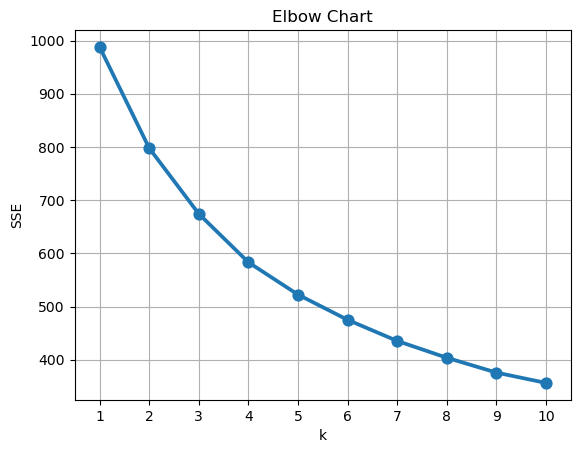

In [20]:
sse = {}
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, n_init= 10, random_state=654)
    kmeans.fit(df_normalized_subset)
    sse[k] = kmeans.inertia_
    
plt.title('Elbow Chart')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x = list(sse.keys()), y = list(sse.values()))
plt.grid(True)

<strong>RESULT:</strong>
It looks like k=6 is the desire number.<br>
However, we should try cluster 5,6 and 7 to figure out which one is the better one.

<strong>First Try => n = 5</strong>

In [21]:
kmeans_model_1 = KMeans(n_clusters=5, n_init=10, random_state=654)
kmeans_model_1.fit(df_normalized_subset)

labels = kmeans_model_1.predict(df_normalized_subset)

In [22]:
model_1_info = df.assign(Cluster = labels)

grouped1 = model_1_info.groupby(['Cluster'])
grouped1.agg({
    'avg_transaction_cost' : 'mean',
    'days_yr' : 'mean',
    'avg_cost_item' : 'mean',
    'number_trucks' : 'mean'
}).round(2)

,avg_transaction_cost,days_yr,avg_cost_item,number_trucks
Cluster,,,,
0,13.22,129.50,4.89,1.83
1,14.12,139.58,4.30,5.19
2,13.97,170.48,4.53,2.12
3,14.33,155.57,7.40,3.25
4,15.86,148.82,4.39,2.73


<strong>n = 5 Result:</strong><br>
Cluster 4 avg_transaction_cost is higher.

<strong>Second Try => n = 6</strong>

In [23]:
kmeans_model_2 = KMeans(n_clusters=6, n_init=10, random_state=654)
kmeans_model_2.fit(df_normalized_subset)

labels = kmeans_model_2.predict(df_normalized_subset)

In [24]:
model_2_info = df.assign(Cluster = labels)

grouped2 = model_2_info.groupby(['Cluster'])
grouped2.agg({
    'avg_transaction_cost' : 'mean',
    'days_yr' : 'mean',
    'avg_cost_item' : 'mean',
    'number_trucks' : 'mean'
}).round(2)

,avg_transaction_cost,days_yr,avg_cost_item,number_trucks
Cluster,,,,
0,14.21,157.82,7.23,4.29
1,15.92,153.33,4.42,2.81
2,14.14,161.07,6.07,1.37
3,13.31,155.85,3.12,2.47
4,14.29,139.64,4.03,5.31
5,13.45,122.97,5.50,2.30


<strong>n = 6 Result:</strong><br>
Cluster 1 avg_transaction_cost is higher. <br>
Cluster 4 and 0 are closer each other for avg_transaction_cost.<br>

Cluster 2 days_yr is higher.<br>
Cluster 0 and 3 are closer each other for days_yr.<br>

Cluster 0 avg_cost_item is higher.<br>
Cluster 2 is closer to Cluster 0 for avg_cost_item.<br>

Cluster 4 is number_trucks higher.<br>
Cluster 0 is closer to Cluster 4 for number_trucks.<br>

<strong>Third Try => n=7</strong>

In [25]:
kmeans_model_3 = KMeans(n_clusters=7, n_init=10, random_state=654)
kmeans_model_3.fit(df_normalized_subset)

labels = kmeans_model_3.predict(df_normalized_subset)

In [26]:
model_3_info = df.assign(Cluster = labels)

grouped3 = model_3_info.groupby(['Cluster'])
grouped3.agg({
    'avg_transaction_cost' : 'mean',
    'days_yr' : 'mean',
    'avg_cost_item' : 'mean',
    'number_trucks' : 'mean'
}).round(2)

,avg_transaction_cost,days_yr,avg_cost_item,number_trucks
Cluster,,,,
0,12.41,146.42,6.03,3.27
1,14.33,161.47,6.01,1.11
2,14.11,137.45,3.68,5.52
3,14.77,157.79,7.26,4.36
4,14.67,124.68,5.16,2.38
5,15.81,160.00,4.29,3.15
6,13.59,155.00,2.93,2.00


<strong>n = 7 Result:</strong><br>
Cluster 5 is higher for avg_transaction_cost.<br>
Cluster 3, 4, 1,2 are closer each other for avg_transaction_cost.<br>

Cluster 1 is higher for days_yr.<br>
Cluster 5 is closer to Cluster 1 for days_yr.<br>

Cluster 3 is higher on avg_cost_item.<br>
Cluster 0 and 1 are closer each other for avg_cost_item.<br>

Cluster 2 is higher for number_trucks.<br>
Cluster 3 is closer to Cluster 2 for number_trucks.<br>

### Deciding the Optimal Number
Based on the elbow plot, it appears that the optimal number of clusters is 6 clusters.<br>
This is the point when the decreasing amount shifts from a higher decrease to a lower decrease. 


In [27]:
kmeans_model = KMeans(n_clusters=6, n_init=10, random_state=654)
kmeans_model.fit(df_normalized_subset)

labels = kmeans_model.predict(df_normalized_subset)

In [28]:
labels

array([2, 4, 4, 1, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 1, 3, 0, 1, 3, 4, 4, 2,
       1, 1, 5, 5, 1, 2, 4, 3, 4, 3, 1, 4, 0, 4, 5, 1, 4, 0, 0, 4, 3, 5,
       5, 0, 2, 3, 4, 2, 1, 2, 0, 4, 4, 2, 2, 1, 1, 3, 2, 5, 2, 3, 1, 5,
       1, 4, 4, 5, 1, 3, 0, 5, 0, 3, 3, 0, 5, 4, 5, 4, 5, 2, 1, 2, 3, 4,
       1, 1, 1, 4, 5, 3, 0, 1, 3, 3, 0, 3, 3, 4, 3, 2, 4, 2, 5, 3, 2, 4,
       1, 4, 0, 1, 2, 4, 4, 2, 3, 0, 1, 0, 2, 0, 1, 4, 0, 0, 2, 2, 0, 3,
       2, 1, 2, 0, 5, 5, 3, 2, 1, 4, 3, 1, 4, 2, 3, 1, 4, 0, 2, 1, 5, 1,
       2, 3, 2, 5, 5, 4, 1, 2, 2, 5, 5, 1, 2, 1, 2, 0, 2, 2, 5, 4, 4, 1,
       5, 3, 3, 4, 5, 2, 3, 1, 4, 1, 1, 5, 1, 5, 2, 1, 1, 0, 4, 1, 5, 1,
       5, 0, 3, 2, 0, 1, 4, 0, 3, 3, 2, 0, 5, 2, 1, 3, 5, 4, 1, 5, 5, 5,
       2, 5, 2, 4, 2, 2, 4, 1, 2, 0, 1, 5, 3, 0, 1, 1, 4, 5, 3, 5, 4, 2,
       0, 0, 1, 1, 4], dtype=int32)

## Summary Statistics 

In [29]:
df_subset = df.loc[df_normalized_subset.index].copy()
df_subset

,avg_transaction_cost,mnths_operational,days_yr,avg_cost_item,number_trucks,dist_lobland,bev_percent
0,12.40,3.0,163,6.83,2,0.12,30.0
1,12.10,1.8,140,3.62,5,269.24,40.5
2,13.52,6.0,139,3.86,5,8.17,35.7
3,15.56,4.0,124,4.05,3,99.09,32.8
4,15.08,8.5,186,6.51,5,33.42,35.6
...,...,...,...,...,...,...,...
243,14.70,2.5,153,10.13,3,127.16,40.2
244,14.75,1.1,170,7.88,4,36.29,41.6
245,15.89,0.7,162,3.22,4,44.35,37.8
246,16.17,1.2,153,4.62,4,91.98,41.1


<strong>What happens here?</strong>

<b>df_subset</b> is created by selecting rows from the original dataset (df) that correspond to the rows in the normalized dataset (df_normalized_subset).<br>
This ensures that the <b>clustering results (stored in labels)</b> can be linked back to the original, unnormalized data.

<b>NOTE:</b><br>
The clustering was done on the normalized data (df_normalized_subset), but the normalized data often lacks the original context (e.g., original feature values).<br> To interpret the clusters meaningfully, you need to map the cluster assignments (labels) back to the original data (df).

<b>NOTE</b><br>
By default, when we use <b>.loc[]</b> or similar pandas methods to select a subset of a DataFrame, it returns a <b>view of the original DataFrame</b>, not a completely independent copy.<br>
A <b>"view"</b> means that changes made to the subset (e.g., df_subset) could potentially affect the original DataFrame (df).<br>
This behavior can lead to unintended side effects and warnings.<br>
Using <b>.copy()</b> ensures that the new DataFrame (df_subset) is a completely independent object and does not share memory with the original DataFrame (df).<br>
Any modifications to df_subset will not affect df.



In [30]:
model_info = df_subset.assign(Cluster=labels)

grouped = model_info.groupby(['Cluster'])
grouped_summary = grouped.agg({
    'avg_transaction_cost' : 'mean',
    'mnths_operational' : 'mean',
    'days_yr' : 'mean',
    'avg_cost_item' : 'mean',
    'number_trucks' : 'mean',
    'dist_lobland' : 'mean',
    'bev_percent' : 'mean'
}).round(2)

grouped_summary

,avg_transaction_cost,mnths_operational,days_yr,avg_cost_item,number_trucks,dist_lobland,bev_percent
Cluster,,,,,,,
0,14.21,2.58,157.82,7.23,4.29,49.05,40.67
1,15.92,3.41,153.33,4.42,2.81,57.52,40.60
2,14.14,3.93,161.07,6.07,1.37,44.08,41.51
3,13.31,5.26,155.85,3.12,2.47,53.87,39.95
4,14.29,3.33,139.64,4.03,5.31,51.03,40.57
5,13.45,3.27,122.97,5.50,2.30,60.13,41.49


## Visualization:
The plots show a boxplot for the average transaction cost, the days of operation, the average cost per item, and the number of trucks.<br>
<b>NOTE:</b> Charts show original variables from the dataset

<br><br>
From the boxplot showing the average transaction cost, we see that cluster 1 has the highest average transaction cost, while cluster 3 seems to have the lowest.<br>
According to the boxplot for the days of operation, cluster 5 has the lowest number of days, while the others seem to be roughly similar.<br>
For the average cost per item plot, cluster 0 has the highest and cluster 3 has the lowest.<br> 
For the number of trucks by cluster, cluster 2 seems to be the lowest while cluster 4 has the highest value.<br><br>
- Overall there seems to be quite a large variety in the values that come from each cluster.<br>
- That's why more charts were created to get to know the clusters well.



<strong>Plot 1: Boxplots of each of the 4 variables split by cluster</strong>

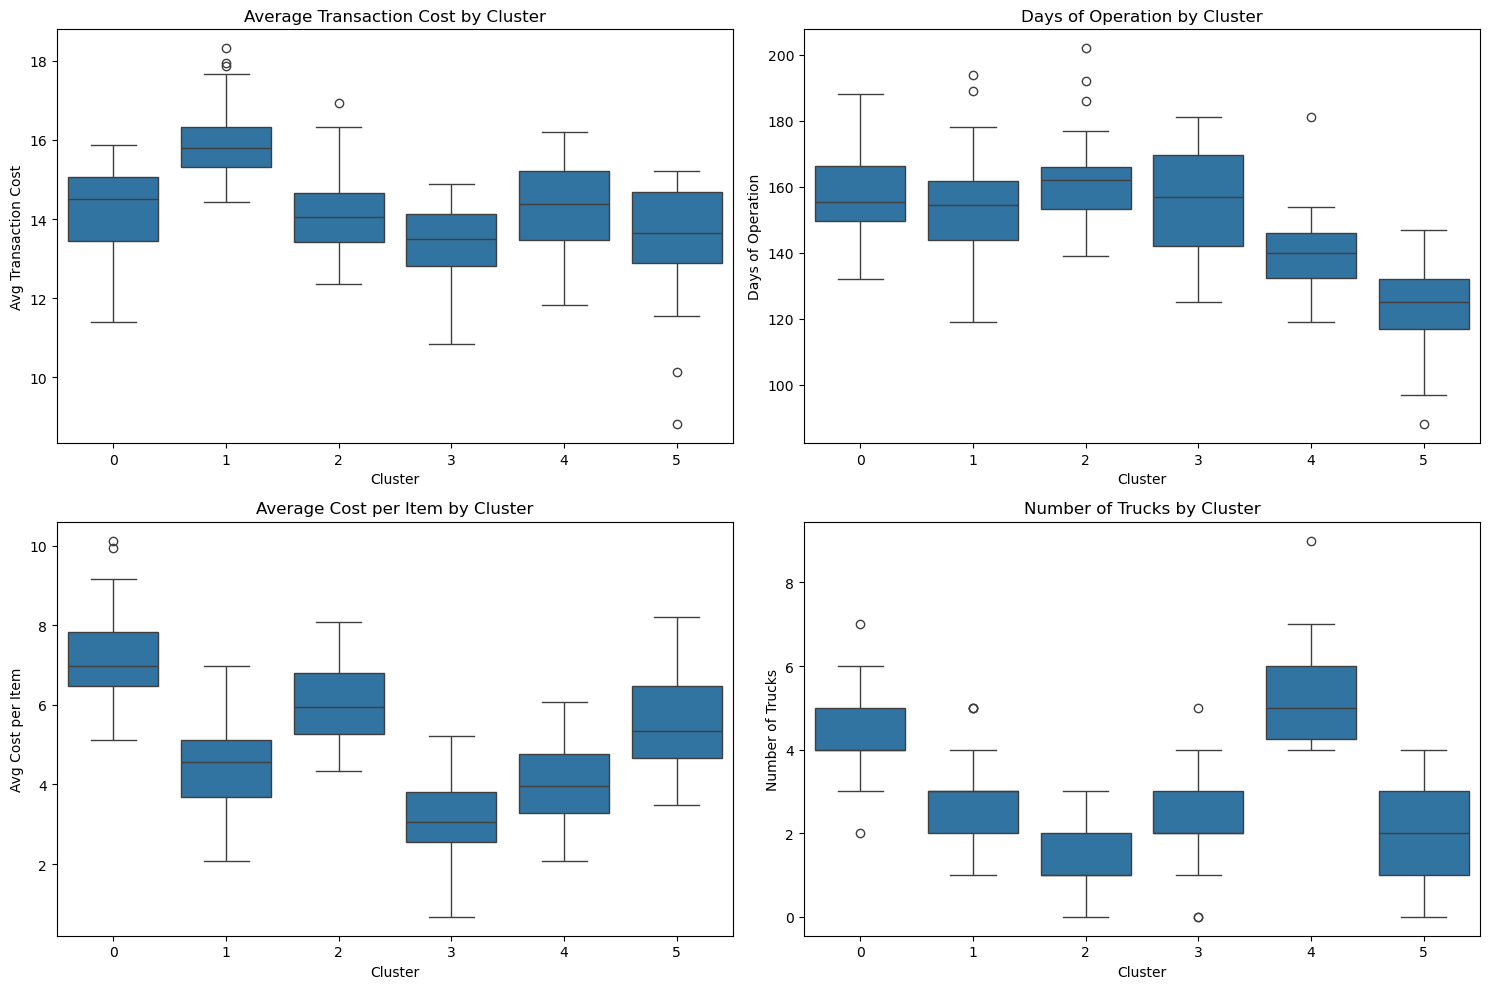

In [31]:
# Select only the relevant columns for visualization from the original dataframe
df_visualization = df[['avg_transaction_cost', 'days_yr', 'avg_cost_item', 'number_trucks']].copy()

# Add the cluster labels to the DataFrame for visualization
df_visualization['cluster'] = labels  # 'labels' comes from the kmeans_model.predict() result

# Set up the matplotlib figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))  

# Define titles and labels for each subplot
titles = ['Average Transaction Cost by Cluster', 'Days of Operation by Cluster',
          'Average Cost per Item by Cluster', 'Number of Trucks by Cluster']

y_labels = ['Avg Transaction Cost', 'Days of Operation',
            'Avg Cost per Item', 'Number of Trucks']

# Iterate over each subplot and create boxplots
for i, ax in enumerate(axs.flat):
    # Ensure the column name is correct and exists in df_visualization
    sns.boxplot(x='cluster', y=df_visualization.columns[i], data=df_visualization, ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel('Cluster')
    ax.set_ylabel(y_labels[i])
    

# Adjust layout for better display and avoid label overlap
plt.tight_layout()
plt.show()

<strong>Plot 2: Scatterplots of pairs of variables</strong>

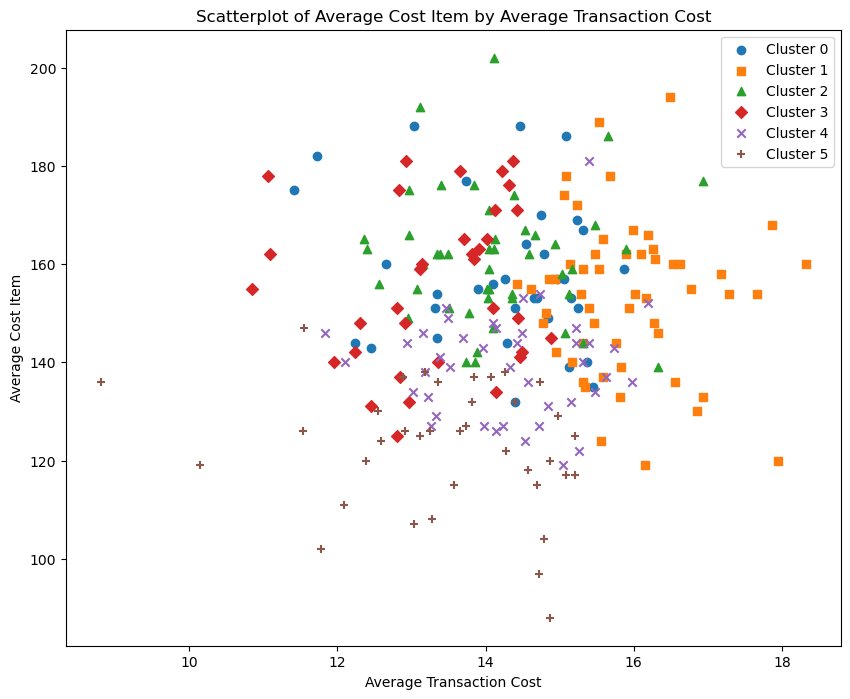

In [32]:
df_subset['cluster'] = labels  # labels from kmeans_model.predict()

# Create a scatter plot with different markers for each cluster
plt.figure(figsize=(10, 8))  # Adjust the size as needed

# Define a dictionary of markers to use for each cluster
markers = {i: marker for i, marker in enumerate(['o', 's', '^', 'D', 'x', '+'])}

# Plot each cluster with a unique marker using list comprehensions
for cluster in sorted(df_subset['cluster'].unique()):
    cluster_data = df_subset[df_subset['cluster'] == cluster]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 2],
                label=f'Cluster {cluster}', marker=markers[cluster % len(markers)])

# Title and labels
plt.title('Scatterplot of Average Cost Item by Average Transaction Cost')
plt.xlabel('Average Transaction Cost')  # Assuming first column is 'Average Transaction Cost'
plt.ylabel('Average Cost Item')  # Assuming third column is 'Average Cost Item'

# Legend
plt.legend()

# Show the plot
plt.show()

<strong>RESULT:</strong><br>
This scatterplot is a plot of each observation of Average Cost per Item versus Average Transaction Cost,
where each point is denoted by a symbol that is specific to one of the 6 clusters.<br>

This plot gives us an idea of the relationship between these two variables when cluster assignment is taken into account.<br>

Cluster 1 primarily in the upper right hand region.<br>
This indicates that both the Average Cost per Item and Average Transaction Cost are higher than average.<br> 

In contrast, Cluster 4 is mostly in the middle of all the points which indicates that this cluster has average values for both Average Transaction Cost and Average price per item.<br> 

Cluster 5 towards the bottom, but centered  left to right.<br>
Thus this cluster has lower than average values for the Average Cost per Item, but about average values for the average transaction cost.<br>


<strong>Density plot split by cluster</strong>

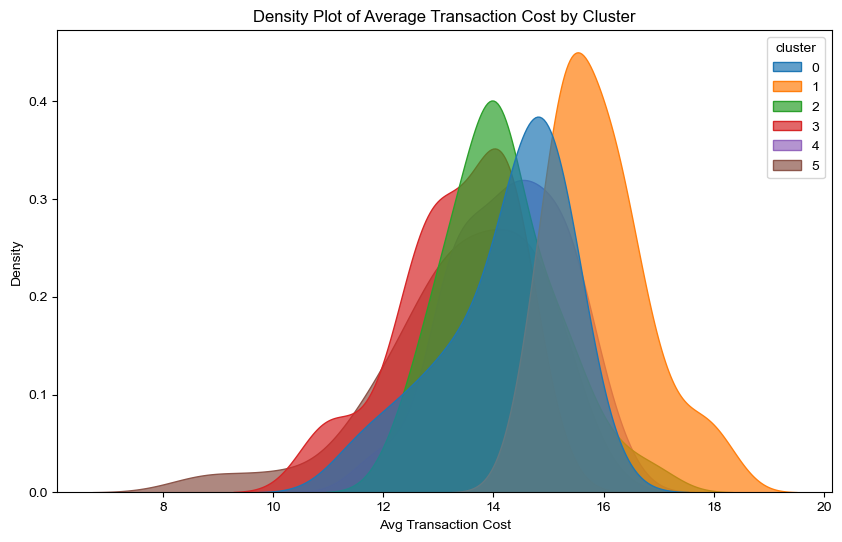

In [33]:
df_subset['cluster'] = labels

# Convert the cluster column to a categorical type
df_subset['cluster'] = df_subset['cluster'].astype('category')

# Plotting with seaborn
plt.figure(figsize=(10, 6))  # Adjust the size as needed

sns.kdeplot(
    data=df_subset,
    x='avg_transaction_cost',  # Replace with your actual column name
    hue='cluster',  # Make sure this is the name of your cluster column
    fill=True,
    common_norm=False,  # This ensures that the densities are normalized separately for each cluster
    alpha=0.7
)

plt.title('Density Plot of Average Transaction Cost by Cluster')
plt.xlabel('Avg Transaction Cost')
plt.ylabel('Density')

# Use this if you want to replicate the theme_minimal from ggplot2
sns.set_theme(style="whitegrid")

plt.show()

<strong>RESULT:</strong><br>
In this density plot we can see the density of the Average Transaction Cost split by each cluster.<br>
This gives us a sense of how the average Transaction Cost is distributed for each cluster.<br> 

We can clearly see that cluster 1 has the highest overall average transaction cost since its density curve is furthest to the right.<br> 
All the other clusters are mostly the same because they nearly all overlap each other.<br> 

The variance for cluster 1 is also smaller indicated by the smaller width of the density curve compared to the other 5 clusters.

## Assigning descriptive name to each of the clusters

<strong>As we can see from the visualizations, we'll denote the clusters as follows:</strong><br>

Cluster 0: Highest Cost Per Item<br>
Cluster 1: Highest Transaction Cost<br>
Cluster 2: Fewest Number of Trucks<br>
Cluster 3: Lowest Cost Per Item<br>
Cluster 4: Most number of Trucks<br>
Cluster 5: Fewest Days of Operation<br>


### The explanations for each group name are provided in the descriptions of each of the plots above.

In [34]:
df_subset.head()

,avg_transaction_cost,mnths_operational,days_yr,avg_cost_item,number_trucks,dist_lobland,bev_percent,cluster
0,12.40,3.0,163,6.83,2,0.12,30.0,2
1,12.10,1.8,140,3.62,5,269.24,40.5,4
2,13.52,6.0,139,3.86,5,8.17,35.7,4
3,15.56,4.0,124,4.05,3,99.09,32.8,1
4,15.08,8.5,186,6.51,5,33.42,35.6,0


In [35]:
df_subset['cluster'] = df_subset['cluster'].cat.rename_categories({
    0 : 'High priced food trucks',
    1 : 'Customers large orders',
    2 : 'Few food truck locations',
    3 : 'Low priced food trucks',
    4 : 'Many food truck locations',
    5 : 'Food trucks not open often'
})
df_subset.head()

,avg_transaction_cost,mnths_operational,days_yr,avg_cost_item,number_trucks,dist_lobland,bev_percent,cluster
0,12.40,3.0,163,6.83,2,0.12,30.0,Few food truck locations
1,12.10,1.8,140,3.62,5,269.24,40.5,Many food truck locations
2,13.52,6.0,139,3.86,5,8.17,35.7,Many food truck locations
3,15.56,4.0,124,4.05,3,99.09,32.8,Customers large orders
4,15.08,8.5,186,6.51,5,33.42,35.6,High priced food trucks
